In [1]:
from config import *

In [2]:
print(f'{year}年{month}月')

2020年8月


# Developer Salary in First-Tier Cities 程序员工资调查
我在4月1日到3日之间，抓取了某招聘网站的软件和互联网类招聘数据40万条，其中通过程序判断为程序员的14万条。地域方面，我选择了24个主要城市。不过本文只以一线城市为研究对象。这样是为了和我2017年6月的数据做对比。

提到2017年的文章，现在居然还有很多人，把这篇文章拿出来炒作。对于社会来说，可气的是，他们直接把2017改成2019，就发表了，这不是骗人么？！对于我来说，可气的是，他们转载居然还冒充是原创，是可忍熟不可忍！

In [3]:
import pandas as pd
import sys
sys.path.append('..')
sys.path.append('../py')
sys.path.append('../../py')
import db
import inspect
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import seaborn as sns
import scipy.stats as stats
import numpy as np
import weighted
%matplotlib inline

In [6]:
conn=db.get_conn()
data_original=pd.read_sql(sql=f"select * from jobs where year_month= {year}{month:02} and monthly_salary>0 and city in ('北京','上海','广州','深圳')  and monthly_salary<80000", con=conn)
conn.close()

In [7]:
data=data_original

In [8]:
#del data['publish_date']
#del data['published_on_weekend']
#del data['title']
#del data['title']
#del data['company_title']
#del data['company_description']
#del data['job_description']
#del data['job_id']

In [9]:
data=data.sort_values(by='headcount', ascending=False)
data.head()

,job_id,year_month,monthly_salary,headcount,title,page_title,zhinengleibie,career,city,province,...,bd_hbase,bd_storm,bd_pig,bd_mahout,bd_impala,bd_yarn,bd_alluxio,bd_flink,bd_presto,bd_heron
27582,121514293,202008,19000,500,初级实验数据分析师（海外）,【深圳-罗湖区初级实验数据分析师（海外）_初级实验数据分析师（海外）招聘_苏州英格玛服务外包...,数据分析师,数据分析师,深圳,广东,...,False,False,False,False,False,False,False,False,False,False
47439,123677205,202008,12500,100,数据分析师,【上海-松江区数据分析师_数据分析师招聘_上海知掘教育科技有限公司】-前程无忧官方招聘网站,数据分析师,数据分析师,上海,上海,...,False,False,False,False,False,False,False,False,False,False
13208,117792359,202008,12500,100,Java中级软件工程师,【北京-海淀区Java中级软件工程师_Java中级软件工程师招聘_长城计算机软件与系统有限公...,软件工程师,软件工程师,北京,北京,...,False,False,False,False,False,False,False,False,False,False
36896,122727851,202008,22500,100,Java开发工程师,【上海-浦东新区Java开发工程师_Java开发工程师招聘_深圳卓博通咨询管理有限公司】-前...,Java开发工程师,软件工程师,上海,上海,...,False,False,False,False,False,False,False,False,False,False
41297,123144912,202008,10416,100,富士康高薪招聘IDPBG师干,【深圳-龙华新区富士康高薪招聘IDPBG师干_富士康高薪招聘IDPBG师干招聘_深圳市兴荣达...,软件工程师,软件工程师,深圳,广东,...,False,False,False,False,False,False,False,False,False,False


In [10]:
def pd_weighted_mean(group, avg_name, weight_name):
    """ http://stackoverflow.com/questions/10951341/pandas-dataframe-aggregate-function-using-multiple-columns
    In rare instance, we may not have weights, so just return the mean. Customize this if your business case
    should return otherwise.
    """
    d = group[avg_name]
    w = group[weight_name]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()


# Unilateral Stats 总体统计

有数据可知，程序员向一线城市集中的趋势非常明显。

According to the statistics, significant amount of developers are in the first tier cities.

In [11]:
data.shape

(58852, 118)

In [12]:
data.headcount.sum()

168932

In [13]:
salary_mean=weighted.weighted_mean(data.monthly_salary.values, data.headcount.values)
q=weighted.weighted_quantile(data.monthly_salary.values,[0.025,0.25,0.5,0.75,0.975], data.headcount.values)
q

array([ 6500., 12000., 15000., 20000., 37500.])

In [14]:
print(f'{year}年{month}月中国一线城市程序员的平均工资为{salary_mean:.0f}元，工资中位数为{q[2]:.0f}元，其中95%的人的工资位于{q[0]:.0f}到{q[4]:.0f}元之间。')

2020年8月中国一线城市程序员的平均工资为16895元，工资中位数为15000元，其中95%的人的工资位于6500到37500元之间。


In [15]:
print(f'In {year}, Developers in China earn {salary_mean:.0f} Yuan as average, '
      f'the median is {q[2]:.0f} Yuan, 95% of them earn between {q[0]:.0f} and {q[4]:.0f} Yuan.')

In 2020, Developers in China earn 16895 Yuan as average, the median is 15000 Yuan, 95% of them earn between 6500 and 37500 Yuan.


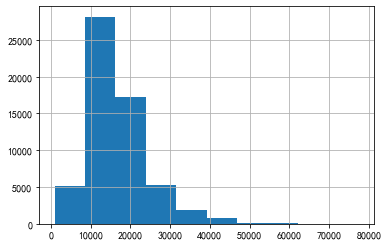

In [16]:
data.monthly_salary.hist()
plt.show()

It does not look like normal distribution.

In [17]:
from scipy import stats

In [18]:
stats.normaltest(data.monthly_salary)

NormaltestResult(statistic=20925.01508104263, pvalue=0.0)

null hypothesis: x comes from a normal distribution
    
p=0

The null hypothesis can be rejected

conclusion: data is not normally distributed.

Zoom in

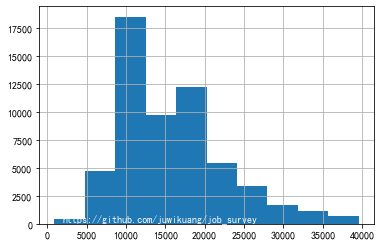

In [19]:
data[data.monthly_salary<40000].monthly_salary.hist()
plt.annotate('https://github.com/juwikuang/job_survey', xy=(0,0), xytext=(2000, 100), color='white')
plt.show()

## Role 角色

In [20]:
#Common Functions
def get_sub_stats_by_col(data, col):
    categories=data[col].unique()
    salary_mean=[]
    salary_95_min=[]
    salary_95_max=[]
    salary_median=[]
    

    count=[]
    
    categorys_out=[]
    for category in categories:
        #print(feature)
        idata=data[data[col]==category]
        headcount=idata.headcount.sum()
        values = idata.monthly_salary.values
        weights = idata.headcount.values
        #print(str(headcount))
        if headcount==0:
            continue
        
        salary_mean.append(np.average(values, weights=weights))
        

        q = weighted.weighted_quantile(values,[0.025,0.5,0.975],weights)
        salary_95_min.append(q[0])
        salary_median.append(q[1])
        salary_95_max.append(q[2])
        count.append(idata.headcount.sum())
        categorys_out.append(category)
    sub_data=pd.DataFrame()
    sub_data[col]=[c for c in categorys_out]
    sub_data['salary_mean']=salary_mean
    sub_data['salary_95_min']=salary_95_min
    sub_data['salary_median']=salary_median
    sub_data['salary_95_max']=salary_95_max
    sub_data['head_count']=count
    sub_data['percentage']=count/np.sum(count)
    sub_data=sub_data.sort_values(by='salary_mean', ascending=False)

    return sub_data

def get_sub_stats_by_prefix(data, prefix):
    
    features = [feature for feature in data.columns if feature.startswith(prefix)]
    salary_mean=[]
    salary_median=[]
    salary_95_min=[]
    salary_95_max=[]
    count=[]
    
    features_out=[]
    for feature in features:
        #print(feature)
        idata=data[data[feature]==1]
        headcount=idata.headcount.sum()
        values = idata.monthly_salary.values
        weights = idata.headcount.values
        #print(str(headcount))
        if headcount==0:
            continue
        
        salary_mean.append(weighted.weighted_mean(values, weights))
        q = weighted.weighted_quantile(values,[0.025,0.5,0.975],weights)
        salary_median.append(q[1])
        salary_95_min.append(q[0])
        salary_95_max.append(q[2])
        count.append(idata.headcount.sum())
        features_out.append(feature)
    sub_data=pd.DataFrame()
    sub_data['rank']=range(0,len(features_out))
    sub_data[prefix]=[f.replace(prefix,'') for f in features_out]
    sub_data['salary_mean']=salary_mean
    sub_data['salary_median']=salary_median
    sub_data['salary_95_min']=salary_95_min
    sub_data['salary_95_max']=salary_95_max
    sub_data['head_count']=count
    sub_data['percentage']=count/np.sum(count)
    sub_data=sub_data.sort_values(by='salary_mean', ascending=False)
    sub_data['rank']=range(1,len(features_out)+1)
    #sub_data=sub_data.reset_index()
    return sub_data

def apply_style(sub_data):
    return sub_data.style.hide_index().format(
    {"salary_mean":"{:.0f}","salary_median":"{:.0f}","salary_95_min":"{:.0f}","salary_95_max":"{:.0f}","percentage":"{:.2%}"})

In [51]:
data_career = get_sub_stats_by_col(data,'career')
data_career.style.format({"salary_mean":"{:.0f}","salary_median":"{:.0f}","salary_95_min":"{:.0f}","salary_95_max":"{:.0f}","percentage":"{:.2%}"})

,career,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
64,反作弊算法工程师,36875,35000,36750,40000,12,0.01%
50,推荐算法工程师,36479,17330,35000,60000,143,0.08%
65,芯片,35319,10983,28055,62500,54,0.03%
61,编译器开发工程师,33397,25000,33333,42500,13,0.01%
5,架构师,30601,12500,30000,55000,3829,2.27%
31,搜索算法工程师,30130,8562,23000,75000,73,0.04%
60,SLAM,30000,30000,30000,30000,10,0.01%
24,数据科学家,28438,9219,27500,52326,175,0.10%
59,CTO,26709,8000,25400,47500,55,0.03%
40,自然语言处理（NLP）,26589,11925,22958,55750,402,0.24%


In [22]:
np.sum(data.monthly_salary * data.headcount) / data.headcount.sum()

16894.56158691071

In [23]:
data.headcount.sum()

168932

In [24]:
data.headcount.describe()

count    58852.000000
mean         2.870455
std          3.361578
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        500.000000
Name: headcount, dtype: float64

In [25]:
pd.options.display.max_columns=100


In [26]:
data.headcount.sum()

168932

# 城市

In [27]:
headcount_by_cities = data.groupby(by='city').headcount.sum()

In [28]:
headcount_by_cities


city
上海    55550
北京    27779
广州    34730
深圳    50873
Name: headcount, dtype: int64

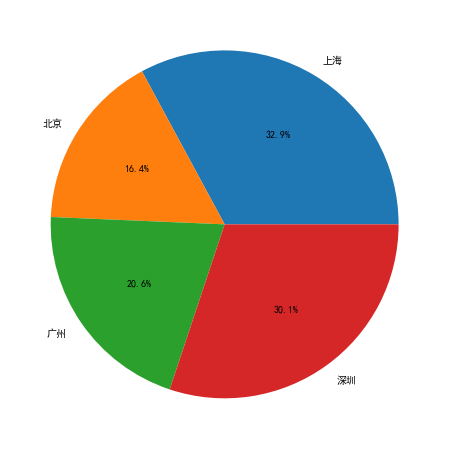

In [29]:
plt.figure(figsize=(10,8))
plt.pie(headcount_by_cities.values, labels=headcount_by_cities.index, autopct='%1.1f%%')
plt.show()

In [30]:
data_pl=get_sub_stats_by_col(data,'city')
apply_style(data_pl)

city,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,19255,7000,17500,45000,27779,16.44%
上海,17417,7000,15500,39583,55550,32.88%
深圳,16913,7000,15000,37500,50873,30.11%
广州,14143,5250,12500,30000,34730,20.56%


In [31]:
salary_beijing=data[data.city=='北京'].monthly_salary
salary_shanghai=data[data.city=='上海'].monthly_salary
salary_guangzhou=data[data.city=='广州'].monthly_salary
salary_shenzhen=data[data.city=='深圳'].monthly_salary

In [32]:
stats.f_oneway(salary_beijing, salary_shanghai)

F_onewayResult(statistic=300.17165727670294, pvalue=6.732675915498406e-67)

In [33]:
stats.f_oneway(salary_shanghai, salary_shenzhen)

F_onewayResult(statistic=95.86751243898271, pvalue=1.3069026953961946e-22)

In [34]:
stats.f_oneway(salary_shenzhen, salary_guangzhou)

F_onewayResult(statistic=966.2925272634382, pvalue=6.590175814992908e-209)

# 编程语言

In [35]:
data_pl=get_sub_stats_by_prefix(data,'pl_')
apply_style(data_pl)

rank,pl_,salary_mean,salary_median,salary_95_min,salary_95_max,head_count,percentage
1,julia,28333,28125,13333,37500,11,0.00%
2,rust,25700,25000,10700,49000,300,0.13%
3,scala,21888,20000,9000,45000,1879,0.78%
4,matlab,20623,20000,9000,40000,3131,1.31%
5,python,20543,17500,7000,45000,21105,8.80%
6,go,20376,17500,8000,45000,18013,7.51%
7,lua,20102,18500,7000,41666,2662,1.11%
8,swift,19287,17500,9000,45000,1691,0.70%
9,r,18438,17500,6000,40000,2478,1.03%
10,kotlin,18193,17500,8000,35000,816,0.34%


数据显示，haskell才是最赚钱的编程语言。python是主流语言里面最赚钱的，比java的工资多了3000元！vb是最不赚钱的了。其中，最赚钱的编程语言和最不赚钱的，工资居然差了2倍。所以，要选好编程语言呀！

# 教育

In [36]:
edu_counts=data[~(data.edu=='')].groupby(by=['edu']).headcount.sum()

In [37]:
edu_counts

edu
初中及以下        12
博士          287
大专        44035
本科       111473
硕士         4785
高中          197
Name: headcount, dtype: int64

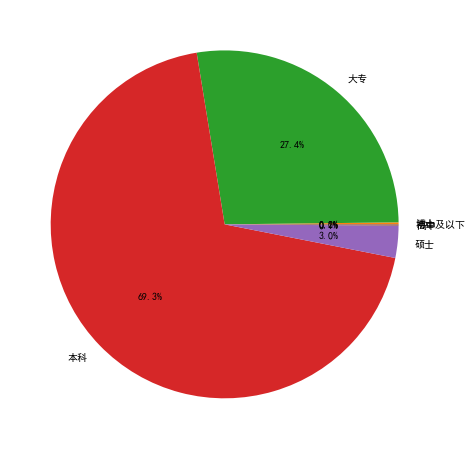

In [38]:
plt.figure(figsize=(10,8))
plt.pie(edu_counts.values, labels=edu_counts.index, autopct='%1.1f%%')
plt.show()

In [39]:
data_edu=get_sub_stats_by_col(data[data.edu.isin(['初中及以下','高中','大专','本科','硕士','博士'])], 'edu')
apply_style(data_edu)

edu,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
博士,29362,15338,27500,62500,287,0.18%
硕士,23475,9000,22500,47688,4785,2.98%
本科,17887,7000,16000,40000,111473,69.33%
大专,13777,5250,12500,27500,44035,27.39%
初中及以下,11354,3750,11406,27500,12,0.01%
高中,7703,3750,7000,15000,197,0.12%


In [40]:
salary_associate=data[data.edu=='大专'].monthly_salary
salary_bachelor=data[data.edu=='本科'].monthly_salary
salary_master=data[data.edu=='硕士'].monthly_salary
salary_phd=data[data.edu=='博士'].monthly_salary

In [41]:
print('大专，本科，硕士，博士的平均工资分别是{:.0f}，{:.0f}，{:.0f}，{:.0f}。中位数分别是{:.0f}， {:.0f}，{:.0f}， {:.0f}。'.format(
    salary_associate.mean(),salary_bachelor.mean(),salary_master.mean(),salary_phd.mean(),
    salary_associate.median(),salary_bachelor.median(),salary_master.median(),salary_phd.median()))

大专，本科，硕士，博士的平均工资分别是13419，17715，23838，30406。中位数分别是12500， 16000，22500， 27500。


In [42]:
stats.f_oneway(salary_phd, salary_master)

F_onewayResult(statistic=44.073162473787065, pvalue=4.1095286632293854e-11)

In [43]:
stats.f_oneway(salary_master, salary_bachelor)

F_onewayResult(statistic=975.9013850918711, pvalue=9.7950482423428e-212)

In [44]:
stats.f_oneway(salary_bachelor, salary_associate)

F_onewayResult(statistic=3660.1855474137833, pvalue=0.0)

经过Oneway Anova Test，证明从大专到博士，学历每提高一级，工资都有显著的提高。

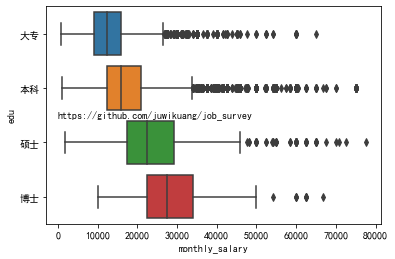

In [45]:

order=['大专','本科','硕士','博士']
a=sns.boxplot(y='edu',x='monthly_salary',order=order,data=data[data.edu.isin(order)], orient='h')
plt.annotate('https://github.com/juwikuang/job_survey', xy=(0.5,1.5), xytext=(2, 1.55))
plt.show()

# 工作经验 Working Experience

In [46]:
data_experience=get_sub_stats_by_col(data, 'experience')
apply_style(data_experience)

experience,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
10+,31365,9000,30000,57694,723,0.43%
5_10,22797,11500,20000,45000,28300,16.75%
3_5,17697,9000,16000,37500,66406,39.31%
,15560,5250,13000,35000,15097,8.94%
1_3,13287,5711,12500,29500,58406,34.57%


In [47]:
salary_we_10=data[data.experience=='10+'].monthly_salary
salary_we_5_10=data[data.experience=='5_10'].monthly_salary
salary_we_3_5=data[data.experience=='3_5'].monthly_salary
salary_we_1_3=data[data.experience=='1_3'].monthly_salary
salary_we_no=data[data.experience=='no'].monthly_salary

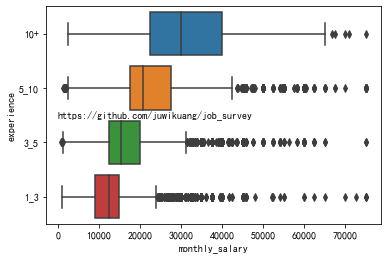

In [48]:

order=['10+','5_10','3_5','1_3']
sns.boxplot(y='experience',x='monthly_salary',order=order,data=data[data.experience.isin(order)], orient='h')
plt.annotate('https://github.com/juwikuang/job_survey', xy=(1.5,1.5), xytext=(1.55, 1.55))
plt.show()

# 公司 Company

## 公司性质 Company Type

In [49]:
data_company_type=get_sub_stats_by_col(data,'company_type')
apply_style(data_company_type)

KeyError: 'company_type'

us_eu是欧美外企，startup是创业公司，listed是上市公司，state是国企，private是私企，foreign是非欧美外企，其他不足1000个样本的不管了。

## 公司规模 Company Size

In [ ]:
data_company_size=get_sub_stats_by_col(data,'company_size')
apply_style(data_company_size)

公司越大，工资越高

## 行业 Industry

In [ ]:
data_industry=get_sub_stats_by_col(data,'industry')
apply_style(data_industry)